In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
text_df = pd.read_csv("training_subset.csv")
text_df.head()

,submission_title,comment,comment_id,url,subreddit_id,label1,label2
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,ip5g6vu,/r/india/comments/xif8wm/shashi_tharoor_set_to...,2qh1q,-1,-1
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper -...,hcontm8,/r/india/comments/pmn9o3/yogi_government_puts_...,2qh1q,-1,-1
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,fbhlv40,/r/india/comments/ebdeup/an_attempt_to_address...,2qh1q,-1,-2
3,You guys noticing what's happening in Sri Lanka?,>The blockade was done by your own people.\n\n...,i2yrud3,/r/india/comments/tt1ryh/you_guys_noticing_wha...,2qh1q,0,0
4,Just got abused on the train by a hyper-nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,hooi92k,/r/india/comments/rh2kcs/just_got_abused_on_th...,2qh1q,-2,-2


In [3]:
text_df.describe()

,label1,label2
count,119.000000,119.000000
mean,-0.058824,-0.201681
std,1.043902,0.916698
min,-2.000000,-2.000000
25%,-1.000000,-1.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,2.000000,2.000000


In [4]:
text_df['avg_score'] = text_df.apply(lambda x: np.mean(x[5:]), axis=1)
text_df.head()

,submission_title,comment,comment_id,url,subreddit_id,label1,label2,avg_score
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,ip5g6vu,/r/india/comments/xif8wm/shashi_tharoor_set_to...,2qh1q,-1,-1,-1.0
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper -...,hcontm8,/r/india/comments/pmn9o3/yogi_government_puts_...,2qh1q,-1,-1,-1.0
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,fbhlv40,/r/india/comments/ebdeup/an_attempt_to_address...,2qh1q,-1,-2,-1.5
3,You guys noticing what's happening in Sri Lanka?,>The blockade was done by your own people.\n\n...,i2yrud3,/r/india/comments/tt1ryh/you_guys_noticing_wha...,2qh1q,0,0,0.0
4,Just got abused on the train by a hyper-nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,hooi92k,/r/india/comments/rh2kcs/just_got_abused_on_th...,2qh1q,-2,-2,-2.0


In [5]:
text_df.describe()

,label1,label2,avg_score
count,119.000000,119.000000,119.000000
mean,-0.058824,-0.201681,-0.130252
std,1.043902,0.916698,0.914715
min,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-0.500000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.500000
max,2.000000,2.000000,2.000000


## Text Cleaning
 - Remove all quotes of previous comments (starts with ">" and ends with newline)
 - Remove special characters other than ,.'"?!
 - Remove links

In [6]:
def clean_quotations(text):
    temp = re.sub(r'>.*?\n', '', text)
    return temp

In [7]:
# clean_punc = re.compile('[^a-zA-Z0-9\s]')
# print(clean_punc.sub('', reviews[0]["text"][0].lower()))

In [8]:
text_df['comment'][3]

">The blockade was done by your own people.\n\nWhat a joke. \n\n>The simple truth is that your communist party aligned with China and created propaganda against India.\n\nThey didn't create any propaganda. India helped their civil war. They are puppet of India. Majority of them have no courage to talk anything about India. \n\nPeople in India die due to Koshi that's why India wants to construct another larger dam so that only Nepali would die.\n\nAnd another simple explanation, when India initiated a road in Lipulekh Kalapani area (which according to Sugauli treaty) is part of Nepal. India never talked about it with Nepal. Because India dissolved the treaty without Nepal's agreement. \n\nWhen every argument ends, we have common culture is your ultimate sword."

In [9]:
clean_quotations(text_df['comment'][3])

"\nWhat a joke. \n\n\nThey didn't create any propaganda. India helped their civil war. They are puppet of India. Majority of them have no courage to talk anything about India. \n\nPeople in India die due to Koshi that's why India wants to construct another larger dam so that only Nepali would die.\n\nAnd another simple explanation, when India initiated a road in Lipulekh Kalapani area (which according to Sugauli treaty) is part of Nepal. India never talked about it with Nepal. Because India dissolved the treaty without Nepal's agreement. \n\nWhen every argument ends, we have common culture is your ultimate sword."

In [10]:
def clean_url(text):
    temp = re.sub(r'(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+\.~#?&\/=]*)', '', text)
    return temp

In [11]:
def clean_text(text):
    temp = clean_quotations(text)
    temp = clean_url(temp)
    temp = re.sub(r'[^a-zA-Z0-9\s\.,?!\'\"]', ' ', temp)
    temp = re.sub(r'\s+', ' ', temp)  # replace multiple spaces with single space
    return temp.strip()

In [12]:
clean_text(text_df['comment'][3])

"What a joke. They didn't create any propaganda. India helped their civil war. They are puppet of India. Majority of them have no courage to talk anything about India. People in India die due to Koshi that's why India wants to construct another larger dam so that only Nepali would die. And another simple explanation, when India initiated a road in Lipulekh Kalapani area which according to Sugauli treaty is part of Nepal. India never talked about it with Nepal. Because India dissolved the treaty without Nepal's agreement. When every argument ends, we have common culture is your ultimate sword."

In [13]:
print(text_df['comment'][14])

Attempt at more elaborate translation, for those who might be interested:

> They are plastering one movie's posters all over the place.
> 
> The whole of BJP cadre is involved in plastering such posters.
> 
> This is why you came in poltics? To plaster... what will you tell you children at home when they ask what do you do for living? - *I plaster movie's posters.*
> 
> They are saying that Kashmir Files should be tax free, why not just upload it on Youtube? It'll be all free free.
> 
> Why are you getting it tax free? Just ask Vivek Agnihotri to put it all on Youtube, it will all be free for everybody to watch.
> 
> I read something in the newspaper yesterday - there's a Haryana BJP MLA who said that he will get a free screening of the movie held in some park - immediately, Vivek posted on twitter addressing Manohar Lal Khattar about this free screening and asking him to tell that MLA to pay for that screening. 
> 
> Listen, some guys are earning crores out of Kashmiri Pandits' trage

In [14]:
clean_text(text_df['comment'][14])

'Attempt at more elaborate translation, for those who might be interested Edit Full video here'

In [15]:
clean_df = pd.DataFrame()
clean_df['clean_title'] = text_df.apply(lambda x: clean_text(x['submission_title']), axis=1)
clean_df['clean_comment'] = text_df.apply(lambda x: clean_text(x['comment']), axis=1)
clean_df[['url', 'avg_score']] = text_df[['url', 'avg_score']]
clean_df.head()

,clean_title,clean_comment,url,avg_score
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,/r/india/comments/xif8wm/shashi_tharoor_set_to...,-1.0
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper t...,/r/india/comments/pmn9o3/yogi_government_puts_...,-1.0
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,/r/india/comments/ebdeup/an_attempt_to_address...,-1.5
3,You guys noticing what's happening in Sri Lanka?,What a joke. They didn't create any propaganda...,/r/india/comments/tt1ryh/you_guys_noticing_wha...,0.0
4,Just got abused on the train by a hyper nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,/r/india/comments/rh2kcs/just_got_abused_on_th...,-2.0


In [4]:
clean_df.to_csv("cleaned_subset.csv", index=False)

In [3]:
clean_df = pd.read_csv("cleaned_subset.csv")
clean_df.head()

,clean_title,clean_comment,url,avg_score
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,/r/india/comments/xif8wm/shashi_tharoor_set_to...,-1.0
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper t...,/r/india/comments/pmn9o3/yogi_government_puts_...,-1.0
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,/r/india/comments/ebdeup/an_attempt_to_address...,-1.5
3,You guys noticing what's happening in Sri Lanka?,What a joke. They didn't create any propaganda...,/r/india/comments/tt1ryh/you_guys_noticing_wha...,0.0
4,Just got abused on the train by a hyper nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,/r/india/comments/rh2kcs/just_got_abused_on_th...,-2.0


## Rule-based classifier

### Knowledge Base

In [37]:
right = """authority, hierarchy, order, duty, tradition, reaction, nationalism, conservatives, right-libertarians, 
neoconservatives, imperialists, monarchists, fascists, reactionaries, traditionalists, traditional, death penalty, 
religion, tradition, Bhajpa, BJP, Shiv Sena, MNS, Sanatan, dharm, Hindutva, Islamophobia, Khalistan, Narendra, Modi, Amit, Shah, 
mandir, ram, Bharatiya, Janata, libtard, Democratic Alliance, NDA, AIADMK, Janta Dal""".lower()
left = """freedom, equality, fraternity, rights, progress, reform, internationalism, anarchists, communists, socialists, 
democratic socialists, social democrats, left-libertarians, progressives, social, liberals, progressive, Congress, 
INC, Aam, aadmi, party, AAP, CPI, CPI(M), Welfare, Protectionism, Commies, Rahul, gandhi, indira, yatra, arvind, kejriwal, 
libby, libbies, sjw, bhakts""".lower()

### Model

In [5]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# Define a function to clean the text
def clean(text):
    res_txt = []
    for line in text.split('\n'):
        if not line.startswith(">"): 
            res_txt.append(line.lower())
    text = "\n".join(res_txt)
    
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub(r'(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+\.~#?&\/=]*)', ' ', text)
    
    return text

text_df['cleaned_comment'] = text_df['comment'].apply(clean)
text_df.head()

,submission_title,comment,comment_id,url,subreddit_id,label1,label2,avg_score,cleaned_comment
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,ip5g6vu,/r/india/comments/xif8wm/shashi_tharoor_set_to...,2qh1q,-1,-1,-1.0,extremely valid points but i believe he has th...
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper -...,hcontm8,/r/india/comments/pmn9o3/yogi_government_puts_...,2qh1q,-1,-1,-1.0,even if the ad was designed by the newspaper t...
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,fbhlv40,/r/india/comments/ebdeup/an_attempt_to_address...,2qh1q,-1,-2,-1.5,diverse population including muslims welcoming...
3,You guys noticing what's happening in Sri Lanka?,>The blockade was done by your own people.\r\n...,i2yrud3,/r/india/comments/tt1ryh/you_guys_noticing_wha...,2qh1q,0,0,0.0,what a joke they didn t create any propaganda...
4,Just got abused on the train by a hyper-nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,hooi92k,/r/india/comments/rh2kcs/just_got_abused_on_th...,2qh1q,-2,-2,-2.0,ohoo bahut bura laga ye sunke ki aap undergarm...


In [38]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

text_df['POS_tagged'] = text_df['cleaned_comment'].apply(token_stop_pos)
right = token_stop_pos(right)
left = token_stop_pos(left)
text_df.head()

,submission_title,comment,comment_id,url,subreddit_id,label1,label2,avg_score,cleaned_comment,POS_tagged,lemmatized_comment,wordCount_comment
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,ip5g6vu,/r/india/comments/xif8wm/shashi_tharoor_set_to...,2qh1q,-1,-1,-1.0,extremely valid points but i believe he has th...,"[(extremely, r), (valid, a), (points, n), (bel...",extremely valid point believe charisma win u...,{'party': 1}
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper -...,hcontm8,/r/india/comments/pmn9o3/yogi_government_puts_...,2qh1q,-1,-1,-1.0,even if the ad was designed by the newspaper t...,"[(even, r), (ad, n), (designed, v), (newspaper...",even ad design newspaper never ever happen i...,{'ad': 1}
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,fbhlv40,/r/india/comments/ebdeup/an_attempt_to_address...,2qh1q,-1,-2,-1.5,diverse population including muslims welcoming...,"[(diverse, a), (population, n), (including, v)...",diverse population include muslim welcome mi...,{'right': 1}
3,You guys noticing what's happening in Sri Lanka?,>The blockade was done by your own people.\r\n...,i2yrud3,/r/india/comments/tt1ryh/you_guys_noticing_wha...,2qh1q,0,0,0.0,what a joke they didn t create any propaganda...,"[(joke, n), (create, v), (propaganda, n), (ind...",joke create propaganda india help civil war ...,"{'part': 1, 'end': 1}"
4,Just got abused on the train by a hyper-nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,hooi92k,/r/india/comments/rh2kcs/just_got_abused_on_th...,2qh1q,-2,-2,-2.0,ohoo bahut bura laga ye sunke ki aap undergarm...,"[(ohoo, a), (bahut, n), (bura, n), (laga, n), ...",ohoo bahut bura laga ye sunke ki aap underga...,"{'aap': 1, 'pe': 1, 'phobia': 1}"


In [39]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

text_df['lemmatized_comment'] = text_df['POS_tagged'].apply(lemmatize)
right = lemmatize(right).split(' , ')
left = lemmatize(left).split(' , ')
text_df.head()

,submission_title,comment,comment_id,url,subreddit_id,label1,label2,avg_score,cleaned_comment,POS_tagged,lemmatized_comment,wordCount_comment
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,ip5g6vu,/r/india/comments/xif8wm/shashi_tharoor_set_to...,2qh1q,-1,-1,-1.0,extremely valid points but i believe he has th...,"[(extremely, r), (valid, a), (points, n), (bel...",extremely valid point believe charisma win u...,{'party': 1}
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper -...,hcontm8,/r/india/comments/pmn9o3/yogi_government_puts_...,2qh1q,-1,-1,-1.0,even if the ad was designed by the newspaper t...,"[(even, r), (ad, n), (designed, v), (newspaper...",even ad design newspaper never ever happen i...,{'ad': 1}
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,fbhlv40,/r/india/comments/ebdeup/an_attempt_to_address...,2qh1q,-1,-2,-1.5,diverse population including muslims welcoming...,"[(diverse, a), (population, n), (including, v)...",diverse population include muslim welcome mi...,{'right': 1}
3,You guys noticing what's happening in Sri Lanka?,>The blockade was done by your own people.\r\n...,i2yrud3,/r/india/comments/tt1ryh/you_guys_noticing_wha...,2qh1q,0,0,0.0,what a joke they didn t create any propaganda...,"[(joke, n), (create, v), (propaganda, n), (ind...",joke create propaganda india help civil war ...,"{'part': 1, 'end': 1}"
4,Just got abused on the train by a hyper-nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,hooi92k,/r/india/comments/rh2kcs/just_got_abused_on_th...,2qh1q,-2,-2,-2.0,ohoo bahut bura laga ye sunke ki aap undergarm...,"[(ohoo, a), (bahut, n), (bura, n), (laga, n), ...",ohoo bahut bura laga ye sunke ki aap underga...,"{'aap': 1, 'pe': 1, 'phobia': 1}"


In [62]:
# Word frequency for comment
from nltk import FreqDist
def word_count(lemmatized_text):
    words = lemmatized_text.split()
    temp=zip(*[words[i:] for i in range(0,2)])
    words.extend([' '.join(t) for t in temp])
    fdist = FreqDist(words)
    return fdist

# Calculate sentiment of word frequency comment
def sentiment_count(freq_dist):
    total = 0
    for term, freq in freq_dist.items():
        if term in left: total -= freq
        if term in right: total += freq
            
    return total

left = list(map(str.strip, left))
right = list(map(str.strip, right))
text_df['wordCount_comment'] = text_df['lemmatized_comment'].apply(word_count)
text_df['sentiment'] = text_df['wordCount_comment'].apply(sentiment_count)
text_df.head()

,submission_title,comment,comment_id,url,subreddit_id,label1,label2,avg_score,cleaned_comment,POS_tagged,lemmatized_comment,wordCount_comment,sentiment
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,ip5g6vu,/r/india/comments/xif8wm/shashi_tharoor_set_to...,2qh1q,-1,-1,-1.0,extremely valid points but i believe he has th...,"[(extremely, r), (valid, a), (points, n), (bel...",extremely valid point believe charisma win u...,"{'extremely': 1, 'valid': 1, 'point': 1, 'beli...",-1
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper -...,hcontm8,/r/india/comments/pmn9o3/yogi_government_puts_...,2qh1q,-1,-1,-1.0,even if the ad was designed by the newspaper t...,"[(even, r), (ad, n), (designed, v), (newspaper...",even ad design newspaper never ever happen i...,"{'even': 1, 'ad': 1, 'design': 1, 'newspaper':...",0
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,fbhlv40,/r/india/comments/ebdeup/an_attempt_to_address...,2qh1q,-1,-2,-1.5,diverse population including muslims welcoming...,"[(diverse, a), (population, n), (including, v)...",diverse population include muslim welcome mi...,"{'diverse': 2, 'population': 2, 'include': 1, ...",-1
3,You guys noticing what's happening in Sri Lanka?,>The blockade was done by your own people.\r\n...,i2yrud3,/r/india/comments/tt1ryh/you_guys_noticing_wha...,2qh1q,0,0,0.0,what a joke they didn t create any propaganda...,"[(joke, n), (create, v), (propaganda, n), (ind...",joke create propaganda india help civil war ...,"{'joke': 1, 'create': 1, 'propaganda': 1, 'ind...",0
4,Just got abused on the train by a hyper-nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,hooi92k,/r/india/comments/rh2kcs/just_got_abused_on_th...,2qh1q,-2,-2,-2.0,ohoo bahut bura laga ye sunke ki aap undergarm...,"[(ohoo, a), (bahut, n), (bura, n), (laga, n), ...",ohoo bahut bura laga ye sunke ki aap underga...,"{'ohoo': 1, 'bahut': 2, 'bura': 1, 'laga': 1, ...",-1


In [63]:
score = 0
for index, row in text_df.iterrows():
    if (row['sentiment'] < 0 and row['avg_score'] < 0) or (row['sentiment'] > 0 and row['avg_score'] > 0) or (row['sentiment']==0 and row['avg_score']==0):
        score+=1
        
score

47

## BERT-based classifier

In [4]:
import torch
from torch import nn
from transformers import BertTokenizer, BertModel

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |
|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |

In [7]:
clean_df['target'] = clean_df['avg_score']/2
clean_df.head()

,clean_title,clean_comment,url,avg_score,target
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,/r/india/comments/xif8wm/shashi_tharoor_set_to...,-1.0,-0.50
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper t...,/r/india/comments/pmn9o3/yogi_government_puts_...,-1.0,-0.50
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,/r/india/comments/ebdeup/an_attempt_to_address...,-1.5,-0.75
3,You guys noticing what's happening in Sri Lanka?,What a joke. They didn't create any propaganda...,/r/india/comments/tt1ryh/you_guys_noticing_wha...,0.0,0.00
4,Just got abused on the train by a hyper nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,/r/india/comments/rh2kcs/just_got_abused_on_th...,-2.0,-1.00


In [8]:
tokenizer = BertTokenizer.from_pretrained("google/muril-base-cased")

In [45]:
tokenizer(clean_df['clean_comment'][0], padding='max_length', max_length = 512, truncation=True, return_tensors="pt")

{'input_ids': tensor([[   104,  96009,   1691,  38666,   6810,   1363,    148,   8994,   1157,
           1207,   1108,  19794,   4394,   1192,   1113,   6952,   1750,  16762,
          10743,   1341,   1121,   7783,   1108,   1936,  31551,  24418,  51325,
           4382,  60648,    121,   7154,    119,    148,   1678,   5526,   1725,
          44165,   6127,   2959, 183153, 159371,   1207,    172,  12521,   1109,
          49676,   2219,   2733,   9610,   1113,   9989,   1147,    121,    105,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              

In [9]:
class MuRILbase(nn.Module):

    def __init__(self, dropout=0.2):

        super(MuRILbase, self).__init__()

        self.bert = BertModel.from_pretrained('google/muril-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.l1 = nn.Linear(768, 200)
        self.l2 = nn.Linear(200, 1)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        
        modules = [self.bert.embeddings, *self.bert.encoder.layer[:-3]]  # freeze all but last few
        for module in modules:
            for param in module.parameters():
                param.requires_grad = False

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        x = self.dropout(pooled_output)
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.tanh(x)

        return x

In [9]:
model = MuRILbase()
model.to(device)

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


MuRILbase(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(197285, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 

In [15]:
# testing with a few inputs
criterion = nn.MSELoss()

temp_batch = list(clean_df['clean_comment'][0:3])
temp_targets = torch.tensor(list(clean_df['target'][0:3])).to(device)
temp = tokenizer(temp_batch, padding='max_length', max_length = 512, truncation=True, return_tensors="pt")
input_ids = temp['input_ids'].to(device)
attention_mask = temp['attention_mask'].to(device)
with torch.no_grad():
    preds = model(input_ids, attention_mask)
#     loss = criterion(preds, temp_targets)
    print(preds)
    print(preds.squeeze(1))
    print(temp_targets)
#     print(loss.item())
    loss = criterion(preds.squeeze(1), temp_targets)
    print(loss.item())

tensor([[-0.0133],
        [-0.0146],
        [-0.0140]], device='cuda:0')
tensor([-0.0133, -0.0146, -0.0140], device='cuda:0')
tensor([-0.5000, -0.5000, -0.7500], device='cuda:0')
0.3380824625492096
0.33807727694511414


In [17]:
def train_loop(model, train_df, num_epochs, batch_size, lr=0.001):
    criterion = nn.MSELoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    losses = []
    
    inputs = train_df.copy()
    for _ in range(num_epochs):
        inputs = inputs.sample(frac=1).reset_index(drop=True)  # shuffle order
        for i in range(int(np.ceil(len(inputs)/batch_size))):
            model.zero_grad()
            
            # getting inputs
            batch = list(inputs['clean_comment'][i:i+batch_size])
            targets = torch.tensor(list(inputs['target'][i:i+batch_size])).to(device)
            temp = tokenizer(batch, padding='max_length', max_length = 512, truncation=True, return_tensors="pt")
            input_ids, attention_mask = temp['input_ids'].to(device), temp['attention_mask'].to(device)
            
            # training model
            preds = model(input_ids, attention_mask).squeeze(1)
            batch_loss = criterion(preds, targets)
            batch_loss.backward()
            optimizer.step()
            
            losses.append(batch_loss.item())
            
            # excplicitly delete variables in cuda
            del batch, targets, temp, input_ids, attention_mask, preds, batch_loss
    return model, losses

In [18]:
model = MuRILbase().to(device)

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
# torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |     906 MB |    2080 MB |  602567 MB |  601661 MB |
|       from large pool |     905 MB |    2077 MB |  602101 MB |  601195 MB |
|       from small pool |       1 MB |       4 MB |     466 MB |     465 MB |
|---------------------------------------------------------------------------|
| Active memory         |     906 MB |    2080 MB |  602567 MB |  601661 MB |
|       from large pool |     905 MB |    2077 MB |  602101 MB |

In [21]:
%%time
model, losses = train_loop(model, clean_df, num_epochs=5, batch_size=16)

Wall time: 16.9 s


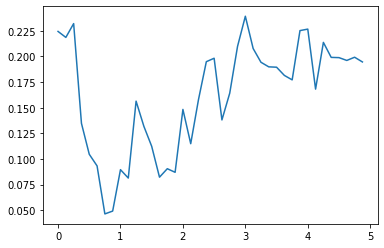

In [22]:
plt.plot([i*5/len(losses) for i in range(len(losses))], losses)